In [13]:
import pandas as pd
from plotnine import *
import numpy as np
import skmisc

In [14]:
df = pd.read_csv('每十万婴儿孕妇死亡人数.csv')

In [15]:
df.head()

,Entity,Code,Year,Maternal mortality ratio
0,Afghanistan,AFG,2000,1450
1,Afghanistan,AFG,2001,1390
2,Afghanistan,AFG,2002,1300
3,Afghanistan,AFG,2003,1240
4,Afghanistan,AFG,2004,1180


In [16]:
s = pd.Series(list(df['Maternal mortality ratio']),index=[df['Entity'],df['Year']])  # 利用一维数据表df1构造一个二级索引Series对象
df2 = s.unstack() # 对s执行stack的逆操作unstack
df2

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Entity,,,,,,,,,,,,,,,,,,
Afghanistan,1450,1390,1300,1240,1180,1140,1120,1090,1030,993,954,905,858,810,786,701,673,638
Africa,857,837,822,801,771,735,701,673,653,634,615,599,585,572,562,548,536,525
Albania,23,23,21,21,18,22,18,19,20,20,21,22,17,16,16,15,16,15
Algeria,161,155,148,145,134,127,122,119,117,117,115,116,116,115,114,114,113,112
Americas,73,72,71,70,70,68,67,66,65,66,64,62,61,60,60,59,59,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Pacific,75,72,69,66,63,61,59,56,55,53,51,49,47,46,44,43,42,41
World,342,335,328,319,309,296,284,274,265,257,248,241,234,229,224,219,214,211
Yemen,301,290,278,266,254,242,230,219,208,200,192,187,184,175,174,169,165,164


In [40]:
#df2.to_csv('2000-2017孕妇死亡比率二维表.csv')

#### 2000-2017死亡率坡度图

In [17]:
df2 = pd.read_csv('2000-2017孕妇死亡比率二维表.csv')
df2

,Entity,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1450,1390,1300,1240,1180,1140,1120,1090,1030,993,954,905,858,810,786,701,673,638
1,Africa,857,837,822,801,771,735,701,673,653,634,615,599,585,572,562,548,536,525
2,Albania,23,23,21,21,18,22,18,19,20,20,21,22,17,16,16,15,16,15
3,Algeria,161,155,148,145,134,127,122,119,117,117,115,116,116,115,114,114,113,112
4,Americas,73,72,71,70,70,68,67,66,65,66,64,62,61,60,60,59,59,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Western Pacific,75,72,69,66,63,61,59,56,55,53,51,49,47,46,44,43,42,41
186,World,342,335,328,319,309,296,284,274,265,257,248,241,234,229,224,219,214,211
187,Yemen,301,290,278,266,254,242,230,219,208,200,192,187,184,175,174,169,165,164
188,Zambia,528,491,465,453,437,421,406,387,356,329,305,283,267,254,242,232,222,213


In [18]:
left_label = df2.apply(lambda x: x['Entity'] + ',' + str(x['2000']), axis=1)
right_label = df2.apply(lambda x: x['Entity'] + ',' + str(x['2017']), axis=1)
df2['class'] = df2.apply(lambda x: 'red' if x['2000']-x['2017']<0 else 'green', axis=1)

C:\Users\wangsiyu\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_segment : Removed 2 rows containing missing values.
C:\Users\wangsiyu\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


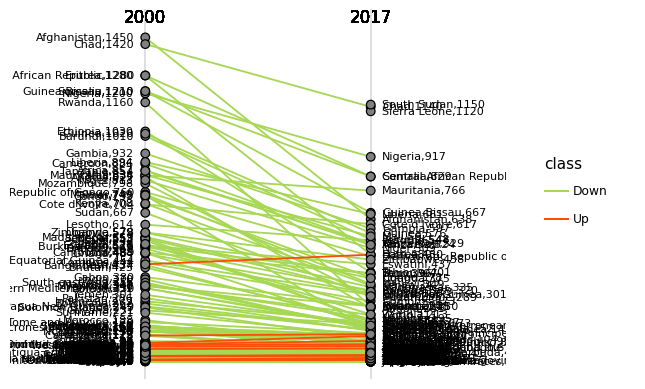

<ggplot: (110379101775)>

In [19]:
(
    ggplot(df2)
    + geom_segment(aes(x=1, xend=2, y='2000', yend='2017', color='class'), size=.75, show_legend=True) #连接线
    + geom_vline(xintercept=1, linetype='solid', size=.1) #2000年的垂直线
    + geom_vline(xintercept=2, linetype='solid', size=.1) #2017年的垂直线
    + geom_point(aes(x=1, y='2000'), size=3, shape='o', fill='grey', color='k')
    + geom_point(aes(x=2, y='2017'), size=3, shape='o', fill='grey', color='k')
    + scale_color_manual(labels=('Down', 'Up'), values=('#A6D854', '#FC4E07'))
    + xlim(.5, 2.5)
    + ylim(0, 1500)
    + geom_text(label=left_label, y=df2['2000'], x=0.95, size=8, ha='right')
    + geom_text(label=right_label, y=df2['2017'], x=2.05, size=8, ha='left')
    + geom_text(label='2000', x=1, y=1540, size=12)
    + geom_text(label='2017', x=2, y=1540, size=12)
    + theme_void()
)

#### 2000-2017死亡原因

In [52]:
from datetime import datetime
df=pd.read_csv('2000-2017孕产妇死亡原因.csv')
df.head()

,Year,Maternal abortion and miscarriage,Maternal deaths aggravated by HIV/AIDS,Maternal obstructed labor and uterine rupture,Maternal hemorrhage,Indirect maternal deaths,Ectopic pregnancy,Other maternal disorders,Maternal sepsis and other maternal infections,Maternal hypertensive disorders,Late maternal deaths
0,2000,251362,10189,39939,490628,120883,36136,166724,188398,210521,59730
1,2001,242095,10354,38501,477304,118719,36519,169200,184675,207317,60740
2,2002,232961,10628,37042,458246,114621,36593,169380,180837,203960,61857
3,2003,223075,10918,35982,436297,111025,36722,168924,176978,200387,62910
4,2004,213821,11087,35847,422695,110489,37127,170257,174051,197542,64318


In [53]:
df['Year'] = df['Year'].apply(str)
df['Year']=[datetime.strptime(d, '%Y').date() for d in df['Year']]
Sum_df=df.iloc[:,1:].apply(lambda x: x.sum(), axis=0).sort_values(ascending=True)
Sum_df

Maternal deaths aggravated by HIV/AIDS            177997
Ectopic pregnancy                                 647860
Maternal obstructed labor and uterine rupture     765457
Late maternal deaths                             1178367
Indirect maternal deaths                         2172815
Maternal sepsis and other maternal infections    2609096
Other maternal disorders                         3013725
Maternal abortion and miscarriage                3146402
Maternal hypertensive disorders                  3272913
Maternal hemorrhage                              6693145
dtype: int64

In [54]:
melt_df = pd.melt(df,id_vars=["Year"],var_name='variable',value_name='value')
melt_df['variable'] = pd.Categorical(melt_df['variable'],categories= Sum_df.index,ordered=True)
melt_df

,Year,variable,value
0,2000-01-01,Maternal abortion and miscarriage,251362
1,2001-01-01,Maternal abortion and miscarriage,242095
2,2002-01-01,Maternal abortion and miscarriage,232961
3,2003-01-01,Maternal abortion and miscarriage,223075
4,2004-01-01,Maternal abortion and miscarriage,213821
...,...,...,...
175,2013-01-01,Late maternal deaths,67561
176,2014-01-01,Late maternal deaths,66659
177,2015-01-01,Late maternal deaths,65792
178,2016-01-01,Late maternal deaths,65946


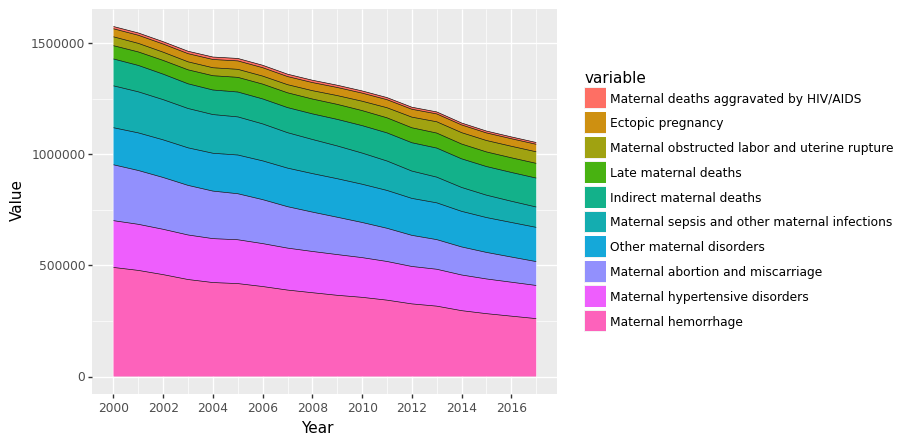

<ggplot: (110379084258)>

In [55]:
#堆积面积图
(
    ggplot(melt_df, aes(x ='Year', y = 'value',fill='variable',group='variable') )+
    geom_area(position="stack", alpha=1)+ 
    geom_line(position="stack", size=0.25, color="black")+
    scale_x_date(date_labels = "%Y", date_breaks = "2 year")+
    scale_fill_hue(s = 0.99, l = 0.65, h=0.0417,color_space='husl')+
    xlab("Year")+ 
    ylab("Value")+
    theme(
        figure_size = (6, 5),
        dpi = 100)
)

## 2017年数据分析

### 提取2017年的数据

#### 孕妇死亡率

In [20]:
df1 = df.query('Year==2017')
#df1.to_csv('2017孕妇死亡比率.csv')

In [25]:
df1 = pd.read_csv('2017孕妇死亡比率.csv')
df1

,Entity,Maternal mortality ratio
0,Afghanistan,638
1,Africa,525
2,Albania,15
3,Algeria,112
4,Americas,57
...,...,...
185,Western Pacific,41
186,World,211
187,Yemen,164
188,Zambia,213


#### 国内生产总值与人口数

In [28]:
df_GDP = pd.read_csv('国内生产总值与人口数.csv')

In [29]:
df_GDP.head()

,Entity,Code,Year,Maternal Mortality Ratio,GDP per capita,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2000,1450.0,NaN,19542986.0,NaN
2,Afghanistan,AFG,2001,1390.0,NaN,19688634.0,NaN
3,Afghanistan,AFG,2002,1300.0,1189.784668,21000258.0,NaN
4,Afghanistan,AFG,2003,1240.0,1235.810059,22645136.0,NaN


In [31]:
df_gdp = df_GDP.query('Year==2017')
#df_gdp.to_csv('2017国内生产总值.csv')

In [32]:
df_GDP = pd.read_csv('2017国内生产总值.csv')
df_GDP

,Entity,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates)
0,Afghanistan,2058.400146,3.564342e+07
1,Africa,NaN,1.263334e+09
2,Albania,12770.963870,2.879361e+06
3,Algeria,11737.401370,4.113655e+07
4,American Samoa,NaN,4.948600e+04
...,...,...,...
273,Western Sahara,NaN,5.188670e+05
274,World,16211.049800,7.599822e+09
275,Yemen,NaN,3.003439e+07
276,Zambia,3485.021729,1.729806e+07


#### 熟练保健人员接生比率

In [34]:
df_doc = pd.read_csv('熟练保健人员接生比率.csv')
df_doc = df_doc.query('Year==2017')

In [36]:
#df_doc.to_csv('2017熟练保健人员接生比率.csv')
df_doc = pd.read_csv('2017熟练保健人员接生比率.csv')
df_doc

,Entity,Births attended by skilled health staff
0,Afghanistan,53.400002
1,Albania,NaN
2,Algeria,NaN
3,Andorra,100.000000
4,Angola,NaN
...,...,...
199,Vietnam,NaN
200,World,NaN
201,Yemen,NaN
202,Zambia,NaN


#### 新生儿死亡率

In [37]:
df_new = pd.read_csv('新生儿死亡率.csv')

In [38]:
df_new = df_new.query('Year==2017')

In [39]:
#df_new.to_csv('2017新生儿死亡率.csv')
df_new = pd.read_csv('2017新生儿死亡率.csv')
df_new

,Entity,"Mortality rate, neonatal"
0,Afghanistan,3.82
1,Albania,0.67
2,Algeria,1.56
3,Andorra,0.15
4,Angola,2.92
...,...,...
204,Vietnam,1.07
205,World,1.83
206,Yemen,2.82
207,Zambia,2.50


#### 子女数

In [40]:
df_chi = pd.read_csv('子女数.csv')
df_chi = df_chi.query('Year==2017')

In [41]:
#df_new.to_csv('2017新生儿死亡率.csv')
df_chi = pd.read_csv('2017子女数.csv')

In [42]:
df = pd.merge(df1, df_GDP)
df = pd.merge(df, df_doc)
df = pd.merge(df, df_new)
data = pd.merge(df, df_chi)

In [44]:
data
#data.to_csv('2017data.csv')

,Entity,Maternal mortality ratio,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Births attended by skilled health staff,"Mortality rate, neonatal","Fertility rate, total"
0,Afghanistan,638,2058.400146,3.564342e+07,53.400002,3.82,4.633000
1,Albania,15,12770.963870,2.879361e+06,NaN,0.67,1.638000
2,Algeria,112,11737.401370,4.113655e+07,NaN,1.56,3.045000
3,Angola,241,7310.896484,3.020863e+07,NaN,2.92,5.600000
4,Antigua and Barbuda,42,19840.283200,9.113300e+04,100.000000,0.39,1.999000
...,...,...,...,...,...,...,...
179,Vietnam,43,7155.443359,9.403305e+07,NaN,1.07,2.042000
180,World,211,16211.049800,7.599822e+09,NaN,1.83,2.427315
181,Yemen,164,NaN,3.003439e+07,NaN,2.82,3.890000
182,Zambia,213,3485.021729,1.729806e+07,NaN,2.50,4.718000


读取2017数据

In [45]:
data = pd.read_csv('2017data.csv')
data

,Entity,Maternal mortality ratio,GDP per capita,Population,Births attended by skilled health staff,"Mortality rate, neonatal","Fertility rate, total"
0,Afghanistan,638,2058.400146,35643420,53.400002,3.82,4.633000
1,Albania,15,12770.963870,2879361,NaN,0.67,1.638000
2,Algeria,112,11737.401370,41136548,NaN,1.56,3.045000
3,Angola,241,7310.896484,30208634,NaN,2.92,5.600000
4,Antigua and Barbuda,42,19840.283200,91133,100.000000,0.39,1.999000
...,...,...,...,...,...,...,...
179,Vietnam,43,7155.443359,94033048,NaN,1.07,2.042000
180,World,211,16211.049800,7599822336,NaN,1.83,2.427315
181,Yemen,164,750.000000,30034386,NaN,2.82,3.890000
182,Zambia,213,3485.021729,17298056,NaN,2.50,4.718000


#### 2017年数据预处理

In [129]:
data.columns.tolist()   #得到列名的list

['Entity',
 'Indicator:Maternal mortality ratio (per 100 000 live births)',
 'GDP per capita, PPP (constant 2017 international $)',
 'Population (historical estimates)',
 'Births attended by skilled health staff (% of total)',
 'Mortality rate, neonatal (per 1,000 live births)',
 'Fertility rate, total (births per woman)']

In [130]:
data.describe() #查看数据的大体情况，均值，最值，分位数值...

,Indicator:Maternal mortality ratio (per 100 000 live births),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Births attended by skilled health staff (% of total),"Mortality rate, neonatal (per 1,000 live births)","Fertility rate, total (births per woman)"
count,184.000000,184.000000,1.840000e+02,79.000000,184.000000,184.000000
mean,161.092391,19285.559173,8.235291e+07,93.226076,1.340326,2.751494
std,232.843406,20268.574406,5.766924e+08,13.209249,1.112061,1.302823
min,2.000000,685.481893,9.113300e+04,41.599998,0.090000,1.052000
25%,12.750000,4219.304932,2.784232e+06,94.750000,0.390000,1.731750
50%,55.500000,12375.827640,9.748407e+06,99.099998,0.980000,2.301500
75%,199.000000,27460.775880,3.030756e+07,99.800003,2.150000,3.634250
max,1150.000000,114985.843800,7.599822e+09,100.000000,4.520000,7.001000


In [131]:
print(data.isnull().sum())  #统计每列有几个缺失值

Entity                                                            0
Indicator:Maternal mortality ratio (per 100 000 live births)      0
GDP per capita, PPP (constant 2017 international $)               0
Population (historical estimates)                                 0
Births attended by skilled health staff (% of total)            105
Mortality rate, neonatal (per 1,000 live births)                  0
Fertility rate, total (births per woman)                          0
dtype: int64


In [132]:
missing_col = data.columns[data.isnull().any()].tolist() #找出存在缺失值的列
missing_col

['Births attended by skilled health staff (% of total)']

In [133]:
#统计每个变量的缺失值占比
def CountNA(data):
    cols = data.columns.tolist()    #cols为data的所有列名
    n_df = data.shape[0]    #n_df为数据的行数
    for col in cols:
        missing = np.count_nonzero(data[col].isnull().values)  #col列中存在的缺失值个数
        mis_perc = float(missing) / n_df * 100
        print("{col}的缺失比例是{miss}%".format(col=col,miss=mis_perc))

CountNA(data)

Entity的缺失比例是0.0%
Indicator:Maternal mortality ratio (per 100 000 live births)的缺失比例是0.0%
GDP per capita, PPP (constant 2017 international $)的缺失比例是0.0%
Population (historical estimates)的缺失比例是0.0%
Births attended by skilled health staff (% of total)的缺失比例是57.065217391304344%
Mortality rate, neonatal (per 1,000 live births)的缺失比例是0.0%
Fertility rate, total (births per woman)的缺失比例是0.0%


异常值

In [136]:
neg_list = ['Indicator:Maternal mortality ratio (per 100 000 live births)', 'GDP per capita, PPP (constant 2017 international $)',
            'Population (historical estimates)', 'Births attended by skilled health staff (% of total)',
            'Mortality rate, neonatal (per 1,000 live births)', 'Fertility rate, total (births per woman)']
#三西格玛法判定异常值
for item in neg_list:
    data[item + '_zscore'] = (data[item] - data[item].mean()) / data[item].std()
    z_abnormal = abs(data[item + '_zscore']) > 3
    print(item + '中有' + str(z_abnormal.sum())+'个异常值')

Indicator:Maternal mortality ratio (per 100 000 live births)中有4个异常值
GDP per capita, PPP (constant 2017 international $)中有3个异常值
Population (historical estimates)中有1个异常值
Births attended by skilled health staff (% of total)中有3个异常值
Mortality rate, neonatal (per 1,000 live births)中有0个异常值
Fertility rate, total (births per woman)中有1个异常值


#### 2017年世界热力图

In [38]:
#产妇死亡率热力图
from pyecharts.charts import Map  
from pyecharts import options as opts
import random
#country = data['Entity'].values.tolist()
#data_world = data['Indicator:Maternal mortality ratio (per 100 000 live births)'].values.tolist()
world = (
    Map()
    .add('', 
        [list(z) for z in zip(list(data['Entity']), list(data['Indicator:Maternal mortality ratio (per 100 000 live births)']))], # 数据
        'world') # 地图类型
    .set_global_opts(
        title_opts=opts.TitleOpts(title='World Map'),
        visualmap_opts=opts.VisualMapOpts(
            #max_=1200,
            #min_=0,
        is_piecewise=True,
                pieces = [

                        {"min": 801 , "label": '>800',"color": "#8B0000"}, #不指定 max，表示 max 为无限大
                        {"min": 501, "max": 800, "label": '501-800',"color" : "#FF0000" },
                        {"min": 251, "max": 500, "label": '251-500',"color": "#FF8C00"},
                        {"min": 101, "max": 250, "label": '101-250',"color": "#FFD700"},
                        {"min": 10, "max": 100, "label": '10-100',"color": "#FFE4B5"},
                        {"min": 0, "max": 9, "label": '0-9',"color" : "#FFFFE0" }])  
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .render(path='世界地图.html')
)


In [44]:
#由熟练人员接生的比率热力图
from pyecharts.charts import Map  
from pyecharts import options as opts
import random
#country = data['Entity'].values.tolist()
#data_world = data['Indicator:Maternal mortality ratio (per 100 000 live births)'].values.tolist()
world = (
    Map()
    .add('', 
        [list(z) for z in zip(list(data['Entity']), list(data['Births attended by skilled health staff (% of total)']))], # 数据
        'world') # 地图类型
    .set_global_opts(
        title_opts=opts.TitleOpts(title='World Map'),
        visualmap_opts=opts.VisualMapOpts(
            #max_=1200,
            #min_=0,
        is_piecewise=True,
                pieces = [

                        {"min": 98, "max":100, "label": '98-100',"color": "#FFFFE0"}, 
                        {"min": 95, "max": 97.99999999, "label": '95-98',"color" : "#FFE4B5" },
                        {"min": 90, "max": 94.99999999, "label": '90-95',"color": "#FFD700"},
                        {"min": 82, "max": 89.99999999, "label": '82-90',"color": "#FF8C00"},
                        {"min": 70, "max": 81.99999999, "label": '70-82',"color": "#FF0000"},
                        {"min": 41, "max": 69.99999999, "label": '40-70',"color" : "#8B0000" }])  
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .render(path='世界地图生产.html')
)


##### 散点图展示大致关系

In [58]:
data.columns.tolist()

['Entity',
 'Indicator:Maternal mortality ratio (per 100 000 live births)',
 'GDP per capita, PPP (constant 2017 international $)',
 'Population (historical estimates)',
 'Births attended by skilled health staff (% of total)',
 'Mortality rate, neonatal (per 1,000 live births)',
 'Fertility rate, total (births per woman)']

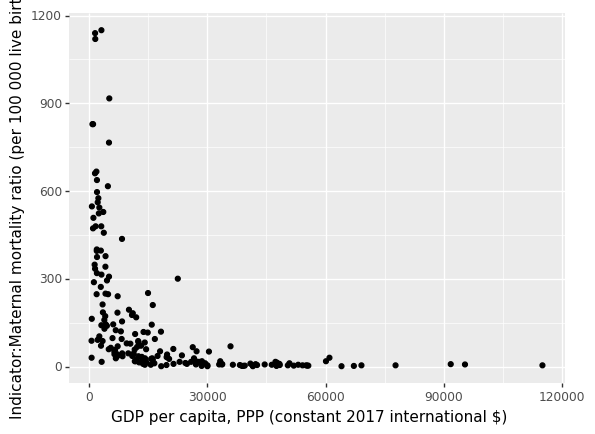

<ggplot: (125665938439)>

In [64]:
p = ggplot(aes(x='GDP per capita, PPP (constant 2017 international $)', y='Indicator:Maternal mortality ratio (per 100 000 live births)'), data)
p + geom_point()

C:\Users\wangsiyu\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 105 rows containing missing values.


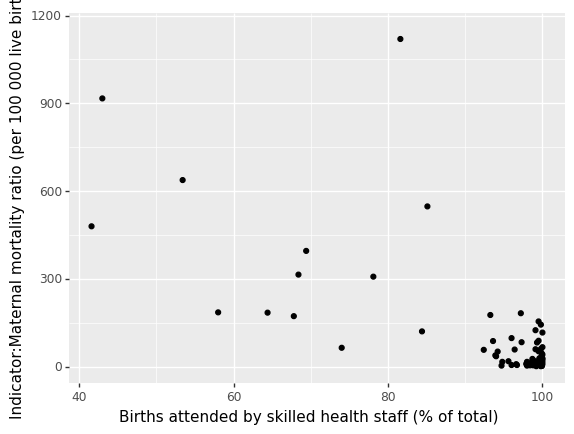

<ggplot: (125665955094)>

In [65]:
p = ggplot(aes(x='Births attended by skilled health staff (% of total)', y='Indicator:Maternal mortality ratio (per 100 000 live births)'), data)
p + geom_point()

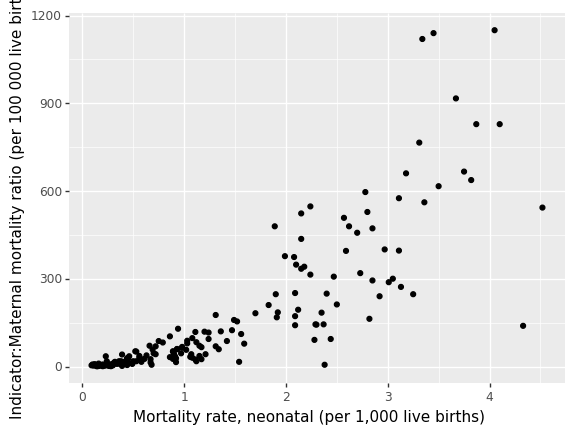

<ggplot: (125666052443)>

In [66]:
p = ggplot(aes(x='Mortality rate, neonatal (per 1,000 live births)', y='Indicator:Maternal mortality ratio (per 100 000 live births)'), data)
p + geom_point()

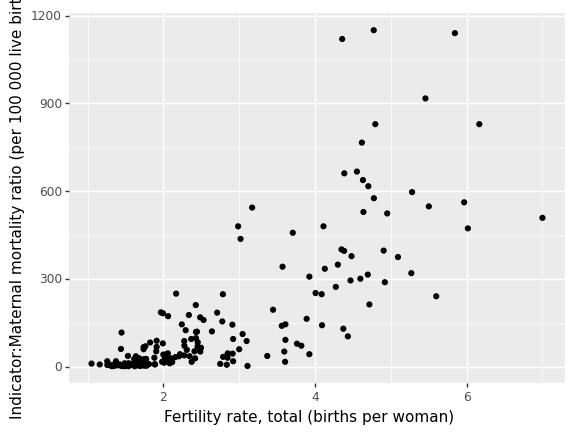

<ggplot: (125666099279)>

In [67]:
p = ggplot(aes(x='Fertility rate, total (births per woman)', y='Indicator:Maternal mortality ratio (per 100 000 live births)'), data)
p + geom_point()

##### 拟合模型

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [113]:
x = sm.add_constant(data.iloc[:,[2,5,6]]) #生成自变量
y = data['Indicator:Maternal mortality ratio (per 100 000 live births)'] #生成因变量
model = sm.OLS(y, x) #生成模型
result = model.fit() #模型拟合
result.summary() #模型描述

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 OLS Regression Results                                                 
========================================================================================================================
Dep. Variable:     Indicator:Maternal mortality ratio (per 100 000 live births)   R-squared:                       0.738
Model:                                                                      OLS   Adj. R-squared:                  0.734
Method:                                                           Least Squares   F-statistic:                     169.1
Date:                                                          Thu, 12 Jan 2023   Prob (F-statistic):           4.03e-52
Time:                                                                  15:47:34   Log-Likelihood:                -1140.2
No. Observations:                                                           184   AIC:                             2288.
Df Residuals:                                                               180   BIC:                             2301.
Df Model:                                                                     3                                         
Covariance Type:                                                      nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                -207.8235     31.677     -6.561      0.000    -270.329    -145.318
GDP per capita, PPP (constant 2017 international $)     0.0014      0.001      2.441      0.016       0.000       0.003
Mortality rate, neonatal (per 1,000 live births)      135.8884     14.506      9.368      0.000     107.265     164.511
Fertility rate, total (births per woman)               58.0854     11.827      4.911      0.000      34.749      81.422
==============================================================================
Omnibus:                       70.712   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.045
Skew:                           1.206   Prob(JB):                    2.94e-116
Kurtosis:                      10.974   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
print(reg.coef_)
print(reg.intercept_) 

[0.00000000e+00 1.39640772e-03 1.35813687e+02 5.81139872e+01]
-207.77300088602072


共线性判断

In [132]:
x1 = sm.add_constant(x.iloc[:,[1,2]]) #生成自变量
y1 = x['GDP per capita, PPP (constant 2017 international $)'] #生成因变量
model = sm.OLS(y1, x1) #生成模型
result = model.fit() #模型拟合
result.summary() #模型描述

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     GDP per capita, PPP (constant 2017 international $)   R-squared:                       0.415
Model:                                                             OLS   Adj. R-squared:                  0.408
Method:                                                  Least Squares   F-statistic:                     64.08
Date:                                                 Thu, 12 Jan 2023   Prob (F-statistic):           9.10e-22
Time:                                                         16:02:13   Log-Likelihood:                -2036.0
No. Observations:                                                  184   AIC:                             4078.
Df Residuals:                                                      181   BIC:                             4088.
Df Model:                                                            2                                         
Covariance Type:                                             nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             3.954e+04   2874.059     13.759      0.000    3.39e+04    4.52e+04
Mortality rate, neonatal (per 1,000 live births) -8417.2929   1775.513     -4.741      0.000   -1.19e+04   -4913.926
Fertility rate, total (births per woman)         -3262.6879   1515.539     -2.153      0.033   -6253.084    -272.292
==============================================================================
Omnibus:                       83.966   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.640
Skew:                           1.806   Prob(JB):                     8.70e-71
Kurtosis:                       8.389   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
1/(1-0.415)

1.7094017094017095

In [134]:
x2 = sm.add_constant(x.iloc[:,[0,2]]) #生成自变量
y2 = x['Mortality rate, neonatal (per 1,000 live births)'] #生成因变量
model = sm.OLS(y2, x2) #生成模型
result = model.fit() #模型拟合
result.summary() #模型描述

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Mortality rate, neonatal (per 1,000 live births)   R-squared:                       0.697
Model:                                                          OLS   Adj. R-squared:                  0.693
Method:                                               Least Squares   F-statistic:                     208.0
Date:                                              Thu, 12 Jan 2023   Prob (F-statistic):           1.25e-47
Time:                                                      16:03:40   Log-Likelihood:                -170.34
No. Observations:                                               184   AIC:                             346.7
Df Residuals:                                                   181   BIC:                             356.3
Df Model:                                                         2                                         
Covariance Type:                                          nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.0150      0.162      0.093      0.926      -0.305       0.335
GDP per capita, PPP (constant 2017 international $) -1.312e-05   2.77e-06     -4.741      0.000   -1.86e-05   -7.66e-06
Fertility rate, total (births per woman)                0.5736      0.043     13.321      0.000       0.489       0.659
==============================================================================
Omnibus:                       35.346   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.531
Skew:                           0.827   Prob(JB):                     2.67e-19
Kurtosis:                       5.902   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
1/(1-0.697)

3.3003300330033

In [136]:
x3 = sm.add_constant(x.iloc[:,[0,1]]) #生成自变量
y3 = x['Fertility rate, total (births per woman)'] #生成因变量
model = sm.OLS(y3, x3) #生成模型
result = model.fit() #模型拟合
result.summary() #模型描述

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Fertility rate, total (births per woman)   R-squared:                       0.668
Model:                                                  OLS   Adj. R-squared:                  0.664
Method:                                       Least Squares   F-statistic:                     181.8
Date:                                      Thu, 12 Jan 2023   Prob (F-statistic):           5.05e-44
Time:                                              16:04:34   Log-Likelihood:                -207.91
No. Observations:                                       184   AIC:                             421.8
Df Residuals:                                           181   BIC:                             431.5
Df Model:                                                 2                                         
Covariance Type:                                  nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   1.7424      0.151     11.523      0.000       1.444       2.041
GDP per capita, PPP (constant 2017 international $) -7.652e-06   3.55e-06     -2.153      0.033   -1.47e-05   -6.39e-07
Mortality rate, neonatal (per 1,000 live births)        0.8630      0.065     13.321      0.000       0.735       0.991
==============================================================================
Omnibus:                       16.560   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.957
Skew:                           0.424   Prob(JB):                     1.15e-07
Kurtosis:                       4.857   Cond. No.                     8.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
1/(1-0.668)

3.0120481927710845

In [123]:
#方差膨胀因子的检测函数
from statsmodels.formula.api import ols
def vif(df, col_i):
    """
    df: 整份数据
    col_i：被检测的列名
    """
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols('formula', df).fit().rsquared
    return 1. / (1. - r2)

岭回归，alpha选为0.05

In [147]:
reg = linear_model.Ridge(alpha=0.05)
reg.fit(x, y) 

Ridge(alpha=0.05)

In [148]:
print(reg.coef_)
print(reg.intercept_) 

[0.00000000e+00 1.39640772e-03 1.35813687e+02 5.81139872e+01]
-207.77300088602072
